<a href="https://colab.research.google.com/github/Marcin19721205/Wprowadzenie-Do-Sieci-Neuronowych/blob/main/14_Keras06_save_load_model01MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zapisywanie i ładowanie wag z modelu

Celem tego notebook'a jest nauczenie się pracy z obsługą modeli, m.in.:
 - zapisanie wag po każdej epoce
 - zapisanie wag po określonej liczbie epok
 - załadowanie wag
 - zapisanie całego modelu
 - załadowanie całego modelu

### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Zapisywanie punktów kontrolnych podczas trenowania](#a3)
5. [Załadowanie wag do modelu](#a4)
6. [Dodatkowe opcje](#a5)
7. [Ręczne zapisywanie wag](#a6)
8. [Zapisanie całego modelu](#a7)




### <a name='a0'> </a> 1. Import bibliotek

In [1]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()
tf.__version__

'2.19.0'

### <a name='a1'> </a> 2. Załadowanie danych i wstępna eksploracja

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

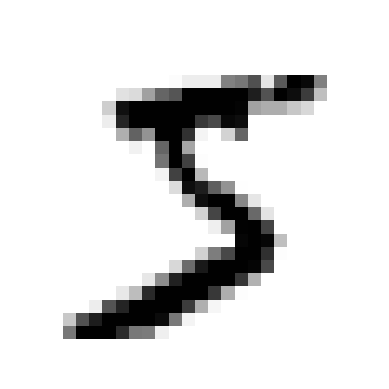

In [5]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

### <a name='a2'> </a> 3. Budowa modelu

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### <a name='a3'> </a> 4. Zapisywanie punktów kontrolnych podczas trenowania

In [13]:
checkpoint_path = 'training/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback that saves the model's weights
checkpoint_path = 'training/cp.weights.h5' # Corrected filepath

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

# Train the model with the callback
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0316
Epoch 1: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0316 - val_accuracy: 0.8720 - val_loss: 0.4149
Epoch 2/10
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0239
Epoch 2: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 0.8720 - val_loss: 0.4133
Epoch 3/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0191
Epoch 3: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 0.8710 - val_loss: 0.4114
Epoch 4/10
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0174
Epoch 4: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 0.8700 - val_loss: 0.4209
Epoch 5/

In [16]:
ls -l {checkpoint_dir}

total 4792
-rw-r--r-- 1 root root 4906368 Nov  2 09:29 cp.weights.h5


### <a name='a4'> </a> 5. Załadowanie wag do modelu

In [17]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 0s - 12ms/step - accuracy: 0.0680 - loss: 2.3805
0.06800000369548798


In [18]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 - 0s - 8ms/step - accuracy: 0.8800 - loss: 0.4206
0.8799999952316284


### <a name='a5'> </a> 6. Dodatkowe opcje

In [19]:
!rm -rf ./training

In [24]:
checkpoint_path = 'training/cp-{epoch:04d}.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create the directory if it doesn't exist
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              save_freq=5 * 1000,  # Save weights every 5 epochs (assuming 1000 samples per epoch)
                              verbose=1)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[cp_callback], verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
!ls -l ./training

total 1612
-rw-r--r-- 1 root root 1647248 Nov  2 09:30 cp-0000.weights.h5


In [26]:
import tensorflow as tf

latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

In [28]:
model = create_model()

latest = tf.train.latest_checkpoint(checkpoint_dir)

if latest:
    model.load_weights(latest)
    loss, acc = model.evaluate(test_images, test_labels, verbose=2)
    print(acc)
else:
    print("No checkpoint found in the directory.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


No checkpoint found in the directory.


### <a name='a6'> </a> 7. Ręczne zapisywanie wag

In [31]:
import os

checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

model.save_weights(os.path.join(checkpoint_dir, 'my_checkpoint.weights.h5'))

model = create_model()

model.load_weights(os.path.join(checkpoint_dir, 'my_checkpoint.weights.h5'))

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 0s - 14ms/step - accuracy: 0.0590 - loss: 2.3932
0.05900000035762787


In [32]:
!ls -l checkpoints/

total 1612
-rw-r--r-- 1 root root 1647248 Nov  2 09:32 my_checkpoint.weights.h5


### <a name='a7'> </a> 8. Zapisanie całego modelu

In [33]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)
model.save('my_model.h5')

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5182 - loss: 1.5676
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8910 - loss: 0.4240
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.2589
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9505 - loss: 0.1913
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9763 - loss: 0.1416


In [34]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.h5')
new_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,052 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - 11ms/step - accuracy: 0.8650 - loss: 0.4208
0.8650000095367432
